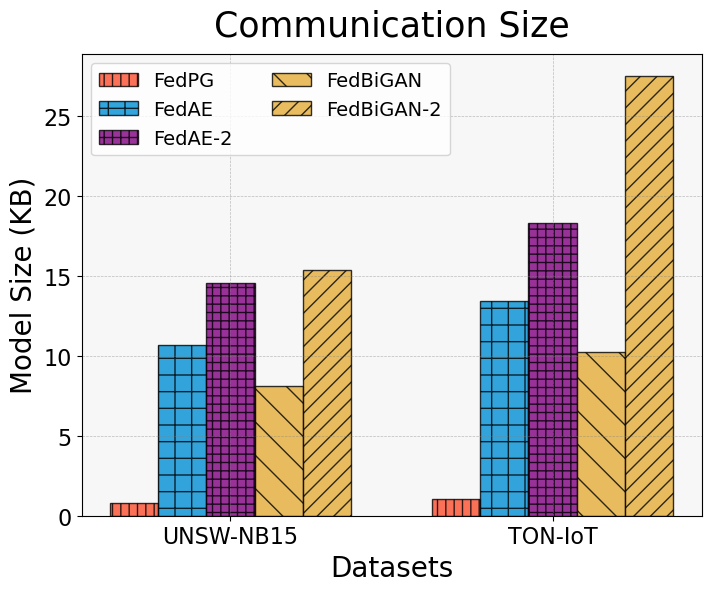

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
categories = np.array(['UNSW-NB15', 'TON-IoT'])
values1 = np.array([0.8, 1.02])
values2 = np.array([10.66, 13.45])
values22 = np.array([14.54, 18.27])
values3 = np.array([8.10, 10.21])
values33 = np.array([15.38, 27.50])
#values3 = np.array([11.3, 87.3, 87.3, 6.5])
#values4 = np.array([11.3, 87.3, 87.3, 6.5])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Set the background color of the plot area
ax.set_facecolor('#f7f7f7')

# Create the bar plot
width = 0.15
opacity = 0.8
x = np.arange(len(categories))
bars1 = ax.bar(x - 2*width, values1, width, 
               color='#fc4f30', hatch ="||", alpha=opacity, 
               edgecolor="k", label='FedPG')
bars2 = ax.bar(x - width, values2, width, 
               color='#008fd5', hatch ="+", alpha=opacity, 
               edgecolor="k", label='FedAE')
bars22 = ax.bar(x , values22, width, 
               color='purple', hatch ="++", alpha=opacity, 
               edgecolor="k", label='FedAE-2')
bars3 = ax.bar(x + width, values3, width, 
               color='#e5ae38', hatch ="\\", alpha=opacity, 
               edgecolor="k", label='FedBiGAN')
bars33 = ax.bar(x + 2*width, values33, width, 
               color='#e5ae38', hatch ="//", alpha=opacity, 
               edgecolor="k", label='FedBiGAN-2')
#bars4 = ax.bar(x + width*2, values4, width, color='#6d904f', label='knnPer')

# Add some labels and title
ax.set_xlabel('Datasets', fontsize = 20)
ax.set_ylabel('Model Size (KB)',  fontsize = 20)
ax.set_title('Communication Size', fontsize = 25, y = 1.02)
ax.tick_params(labelsize=16)
ax.set_xticks(x, categories)

# Add data labels to the plot
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
#add_labels(bars1)
#add_labels(bars2)
#add_labels(bars3)
#add_labels(bars4)

# Add a legend to the plot
ax.legend(loc='upper left', ncols=2,  fontsize = 14)

# Add a grid to the plot
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Set the xlim and ylim of the plot
#ax.set_xlim([-0.5, 4])
#ax.set_ylim([0, 100])
# Adjust plot padding
#plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('communication.pdf')
# Show the plot
plt.show()


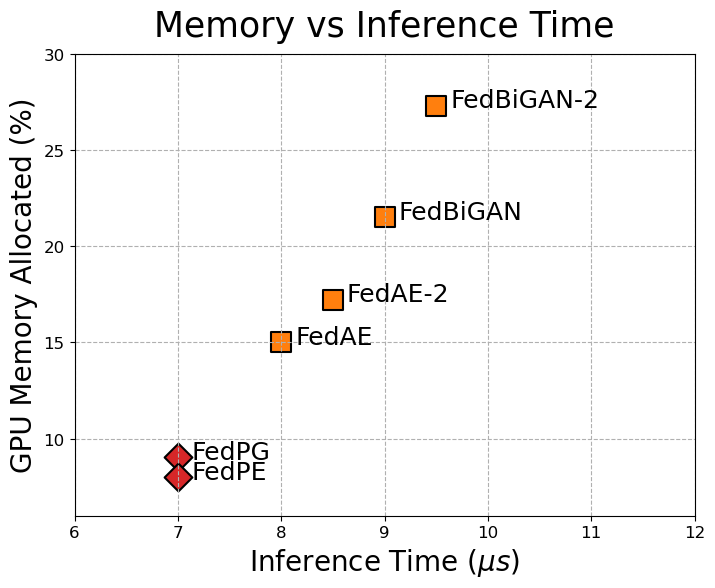

In [3]:
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True

models = ["FedPG", "FedPE", "FedAE", "FedAE-2", "FedBiGAN", "FedBiGAN-2"]
memory = [9.03, 8.01, 15.03, 17.23, 21.50, 27.31]
inference_time = [7, 7, 8, 8.5, 9, 9.5]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

#fig, ax = plt.subplots()

# Set axis labels and title
ax.set_xlabel(r"Inference Time ($\mu s$)", fontsize=20)
ax.set_ylabel("GPU Memory Allocated (%)", fontsize=20)
plt.title("Memory vs Inference Time", fontsize=25, y = 1.02)

# Define distinct markers and colors for DEQ-ResNet and ResNet models
markers = {
    'FedPG': 'D',
    'FedPE': 'D',
    'FedAE': 's',
    'FedAE-2': 's',
    'FedBiGAN': 's',
    'FedBiGAN-2': 's'
}
colors = {
    'FedPG': 'tab:red',
    'FedPE': 'tab:red',
    'FedAE': 'tab:orange',
    'FedAE-2': 'tab:orange',
    'FedBiGAN': 'tab:orange',
    'FedBiGAN-2': 'tab:orange'
}

# Plot scatter points with distinct markers and colors
for model, x, y in zip(models, inference_time, memory):
    model_type = model
    ax.scatter(x, y, marker=markers[model_type], label=model, color=colors[model_type], edgecolors='k', s=200, linewidths=1.5)

# Annotate points with model names (position above the markers)
for model, x, y in zip(models, inference_time, memory):
    ax.annotate(model, (x, y), textcoords="offset points", xytext=(10, -5), ha='left', fontsize=18, va='bottom')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Set grid and background color
ax.grid(True, linestyle='--', linewidth=0.8)
ax.set_facecolor('white')
ax.set_xlim(6, 12)
# Set the aspect ratio of the plot
ax.set_aspect('auto')
# Set y-axis limits
ax.set_ylim(6, 30)

plt.savefig('memory_time.pdf', dpi=300, bbox_inches='tight')

plt.show()
